<a href="https://colab.research.google.com/github/RandomUserName77/RandomUserName77/blob/main/funda_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Studio producing movies asks for ingishts
Procurement team asks what films to sign next

About data:
- ratings between and 2018 (therefore not most up to date) - let's pretend it's 2018
- tags are in English?
- data is focused around users of iMDB and English users, therefore this bias has to be noted
- what is more possibly some review bombing might be filtered out by iMDB

Insights will therefore about movies to realeas tha might have a high rating, not neccassairly grossing movies, or profiting

[}dsfhkdsjfnbsdkjfn

What could be done?
- rating per movie
- rating per release year
- avg rating per rating year/month
- rating per genre
- see if tags from users match genres
- movies/genres better than the average
- good movies with only one instance?
- does title length have impact on ratings?
- genres rating overtime

Data Analyst at funda Exercise: Insights

Congratulations! You are the newest data analyst at ourstreaming.com, a streaming service for movies, very similar to Netflix. Two of the features of our app is allowing our users to rate and tag movies right after they watch them.

A Studio that produces movies asked us whether we could provide valuable (for them) insights based on our data. Also, our procurement team, i.e. the team that signs new studios and new films, asked us whether we could help them make data-driven decisions on what films to sign next.
As our Data Analyst, you are tasked with producing those insights for the Studio and our own internal procurement team, based on the data that we have gathered from our users’ activity (tagging and rating).

Good luck! You got this!

# Load data

In [2]:
movies_df = pd.read_csv("/content/drive/MyDrive/funda_assignment/movies.csv")
ratings_df = pd.read_csv("/content/drive/MyDrive/funda_assignment/ratings.csv")
tags_df = pd.read_csv("/content/drive/MyDrive/funda_assignment/tags.csv")

In [3]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108997 entries, 0 to 1108996
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1108997 non-null  int64 
 1   movieId    1108997 non-null  int64 
 2   tag        1108981 non-null  object
 3   timestamp  1108997 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.8+ MB


In [4]:
tags_df['movieId'].nunique()

45981

# Data manipulation

In [5]:
## Movies
# Extract title
movies_df["title_new"] = movies_df["title"].str.rsplit(n=1, expand=True).iloc[:, 0].str.strip()

# Extract year
movies_df["release_year"] = movies_df["title"].str.extract(r'\((\d{4})\)', expand=False)

# Extract genre
movies_df["action"] = movies_df["genres"].str.extract("(Action)")
movies_df["adventure"] = movies_df["genres"].str.extract("(Adventure)")
movies_df["animation"] = movies_df["genres"].str.extract("(Animation)")
movies_df["children"] = movies_df["genres"].str.extract("(Children)")
movies_df["comedy"] = movies_df["genres"].str.extract("(Comedy)")
movies_df["crime"] = movies_df["genres"].str.extract("(Crime)")
movies_df["documentary"] = movies_df["genres"].str.extract("(Documentary)")
movies_df["drama"] = movies_df["genres"].str.extract("(Drama)")
movies_df["fantasy"] = movies_df["genres"].str.extract("(Fantasy)")
movies_df["film_noir"] = movies_df["genres"].str.extract("(Film-Noir)")
movies_df["horror"] = movies_df["genres"].str.extract("(Horror)")
movies_df["imax"] = movies_df["genres"].str.extract("(IMAX)")
movies_df["musical"] = movies_df["genres"].str.extract("(Musical)")
movies_df["mystery"] = movies_df["genres"].str.extract("(Mystery)")
movies_df["romance"] = movies_df["genres"].str.extract("(Romance)")
movies_df["sci_fi"] = movies_df["genres"].str.extract("(Sci-Fi)")
movies_df["thriller"] = movies_df["genres"].str.extract("(Thriller)")
movies_df["war"] = movies_df["genres"].str.extract("(War)")
movies_df["western"] = movies_df["genres"].str.extract("(Western)")
movies_df["no_genre"] = movies_df["genres"].str.extract("(no genres listed)")

# 0.6% movies do not seem to have release year that I could easily pick up, or simply
# it was not provided
movies_df_no_release_year = movies_df.loc[movies_df["release_year"].isnull()]
movies_df = movies_df.loc[~movies_df["release_year"].isnull()]
movies_df['release_year'] = movies_df['release_year'].astype(int)


## Ratings
# Add dummy rating id
ratings_df["dummy_rating_id"] = (np.arange(ratings_df.shape[0]) + 1)

# Convert timestamp to date
ratings_df["rating_date"] = pd.to_datetime(ratings_df["timestamp"], unit='s').dt.strftime("%Y-%m-%d")

ratings_df['rating_date'] = pd.to_datetime(ratings_df['rating_date']).dt.normalize()

## Tags
# Add dummy rating id
tags_df["dummy_tag_id"] = (np.arange(tags_df.shape[0]) + 1)

# Convert timestamp to date
tags_df["tag_date"] = pd.to_datetime(tags_df["timestamp"], unit='s').dt.strftime("%Y-%m-%d")

tags_df['tag_date'] = pd.to_datetime(tags_df['tag_date']).dt.normalize()

## Data exploration

## Movies

In [6]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57771 entries, 0 to 58097
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movieId       57771 non-null  int64 
 1   title         57771 non-null  object
 2   genres        57771 non-null  object
 3   title_new     57771 non-null  object
 4   release_year  57771 non-null  int64 
 5   action        7114 non-null   object
 6   adventure     4058 non-null   object
 7   animation     2661 non-null   object
 8   children      2744 non-null   object
 9   comedy        15938 non-null  object
 10  crime         5099 non-null   object
 11  documentary   5082 non-null   object
 12  drama         24105 non-null  object
 13  fantasy       2632 non-null   object
 14  film_noir     364 non-null    object
 15  horror        5543 non-null   object
 16  imax          197 non-null    object
 17  musical       1112 non-null   object
 18  mystery       2770 non-null   object
 19  roma

In [7]:
movies_df.describe()

,movieId,release_year
count,57771.000000,57771.000000
mean,111636.410673,1991.399249
std,59889.476538,24.947698
min,1.000000,1874.000000
25%,72067.500000,1976.000000
50%,126028.000000,2001.000000
75%,161239.000000,2011.000000
max,193886.000000,2018.000000


In [8]:
# Check min value
# movies_df.loc[movies_df['release_year'] == 1874]
# Check max value
# movies_df.loc[movies_df['release_year'] == 2018
movies_df = movies_df.loc[movies_df['release_year'] > 1920]

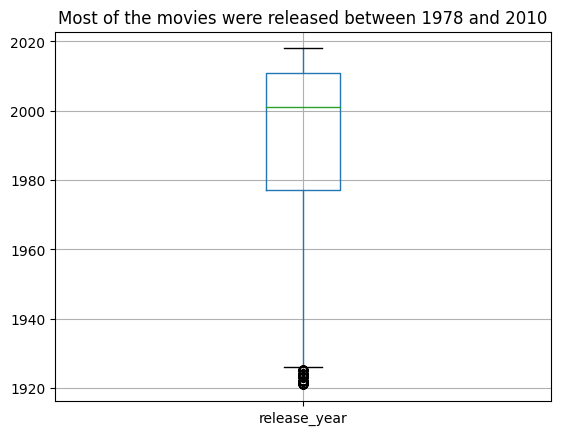

In [9]:
# chart1_relaease_year_boxplot = movies_df.boxplot(column=['release_year'])
# plt.title('Most of the movies were released between 1978 and 2010')
# plt.show()
# chart1_relaease_year_boxplot.savefig('chart1_relaease_year_boxplot.png')

chart1_relaease_year_boxplot = plt.figure()
bp = movies_df.boxplot(column=['release_year'])
plt.title('Most of the movies were released between 1978 and 2010')
chart1_relaease_year_boxplot.savefig('chart1_relaease_year_boxplot.png')


# Vast majority of the movies fall into timeframe between ~1978 to ~2010
# There seems to be quite a lot of movies that were relased before 1920
# Those are defined as outliers

# Movies with release date before 1920 will be removed due to several assumed reasons:
# 1. They might be mute movies, with bad quality and/or outaded format
# 2. Likeliness of someone wanting to watch a move from that era is low
# 3. The streaming platform does not want to appeal to a niche audience
# 4. Number of reviews will most likely be low
# 5. Quality of those movies might be unusable
# 6. Copyrights might be fuzzy

## Ratings

In [10]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   userId           int64         
 1   movieId          int64         
 2   rating           float64       
 3   timestamp        int64         
 4   dummy_rating_id  int64         
 5   rating_date      datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 1.2 GB


In [11]:
ratings_df.describe()

,userId,movieId,rating,timestamp,dummy_rating_id
count,2.775344e+07,2.775344e+07,2.775344e+07,2.775344e+07,2.775344e+07
mean,1.419420e+05,1.848800e+04,3.530445e+00,1.193122e+09,1.387672e+07
std,8.170740e+04,3.510263e+04,1.066353e+00,2.160482e+08,8.011729e+06
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08,1.000000e+00
25%,7.117600e+04,1.097000e+03,3.000000e+00,9.986053e+08,6.938362e+06
50%,1.420220e+05,2.716000e+03,3.500000e+00,1.174256e+09,1.387672e+07
75%,2.124590e+05,7.150000e+03,4.000000e+00,1.422744e+09,2.081508e+07
max,2.832280e+05,1.938860e+05,5.000000e+00,1.537945e+09,2.775344e+07


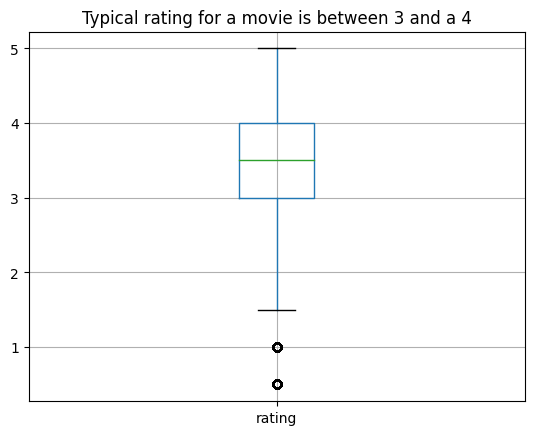

In [12]:
chart2_ratings_boxplot = plt.figure()
bp = ratings_df.boxplot(column = ['rating'])
plt.title('Typical rating for a movie is between 3 and a 4')
chart2_ratings_boxplot.savefig('chart2_ratings_boxplot.png')

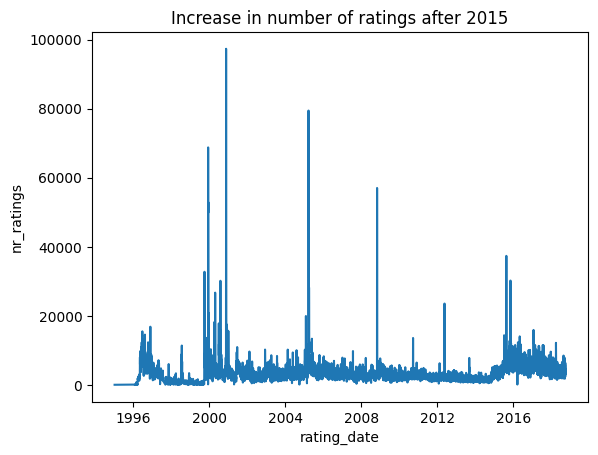

In [13]:
chart3_ratings_date = plt.figure()
bp = sns.lineplot(data=ratings_df.groupby('rating_date').agg(
    avg_rating=('rating', 'mean'),
    nr_ratings=('dummy_rating_id', 'count')
), x="rating_date", y="nr_ratings")
plt.title('Increase in number of ratings after 2015')
chart3_ratings_date.savefig('chart3_ratings_date.png')

## Tags

In [14]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108997 entries, 0 to 1108996
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   userId        1108997 non-null  int64         
 1   movieId       1108997 non-null  int64         
 2   tag           1108981 non-null  object        
 3   timestamp     1108997 non-null  int64         
 4   dummy_tag_id  1108997 non-null  int64         
 5   tag_date      1108997 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 50.8+ MB


In [15]:
tags_df.describe()

,userId,movieId,timestamp,dummy_tag_id
count,1.108997e+06,1.108997e+06,1.108997e+06,1.108997e+06
mean,1.248016e+05,5.492109e+04,1.413544e+09,5.544990e+05
std,7.726964e+04,5.618123e+04,1.144358e+08,3.201400e+05
min,1.400000e+01,1.000000e+00,1.135429e+09,1.000000e+00
25%,7.340600e+04,3.362000e+03,1.323903e+09,2.772500e+05
50%,1.030130e+05,4.374400e+04,1.446994e+09,5.544990e+05
75%,1.883600e+05,9.682100e+04,1.525549e+09,8.317480e+05
max,2.832210e+05,1.938680e+05,1.537945e+09,1.108997e+06


In [16]:
tags_df['tag'].value_counts()

sci-fi                 9400
atmospheric            6430
action                 6219
comedy                 5923
surreal                5299
                       ... 
Thirlling Climax          1
netwatch                  1
hateuscuztheyaintus       1
addium                    1
rachel mcadams            1
Name: tag, Length: 74714, dtype: int64

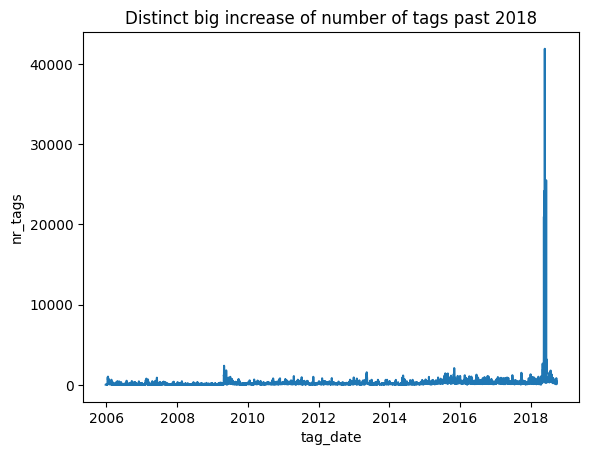

In [17]:
chart4_tags_date = plt.figure()
bp = sns.lineplot(data=tags_df.groupby('tag_date').agg(
    nr_tags=('dummy_tag_id', 'count')
), x="tag_date", y="nr_tags")
plt.title('Distinct big increase of number of tags past 2018')
chart4_tags_date.savefig('chart4_tags_date.png')

In [18]:
(tags_df.loc[tags_df['tag_date'] > '2018-01-01'].groupby('movieId').agg(
    nr_tags=('dummy_tag_id', 'count')
)).reset_index().sort_values('nr_tags', ascending = False)

,movieId,nr_tags
21988,122912,1151
26955,140956,705
21986,122906,646
38056,179819,630
37070,176371,603
...,...,...
15395,90545,1
30523,154404,1
15392,90533,1
5948,6878,1


In [19]:
tags_df.groupby('movieId').agg(
    nr_tags=('dummy_tag_id', 'count')
).reset_index().sort_values('nr_tags', ascending = False)

,movieId,nr_tags
248,260,9478
282,296,4963
14819,79132,4670
2343,2571,3915
2716,2959,3864
...,...,...
29529,137250,1
40519,173111,1
34984,156264,1
34985,156266,1


# Analysis

In [20]:
# Average rating per movie
ratings_df_agg = ratings_df.groupby('movieId').agg(
    avg_rating=('rating', 'mean'),
    nr_ratings=('dummy_rating_id', 'count')
)

ratings_df_agg = ratings_df_agg.merge(movies_df, on='movieId', how='inner')

In [21]:
ratings_df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53136 entries, 0 to 53135
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movieId       53136 non-null  int64  
 1   avg_rating    53136 non-null  float64
 2   nr_ratings    53136 non-null  int64  
 3   title         53136 non-null  object 
 4   genres        53136 non-null  object 
 5   title_new     53136 non-null  object 
 6   release_year  53136 non-null  int64  
 7   action        6541 non-null   object 
 8   adventure     3709 non-null   object 
 9   animation     2627 non-null   object 
 10  children      2653 non-null   object 
 11  comedy        14792 non-null  object 
 12  crime         4695 non-null   object 
 13  documentary   4837 non-null   object 
 14  drama         22443 non-null  object 
 15  fantasy       2481 non-null   object 
 16  film_noir     360 non-null    object 
 17  horror        5193 non-null   object 
 18  imax          197 non-null

<Axes: >

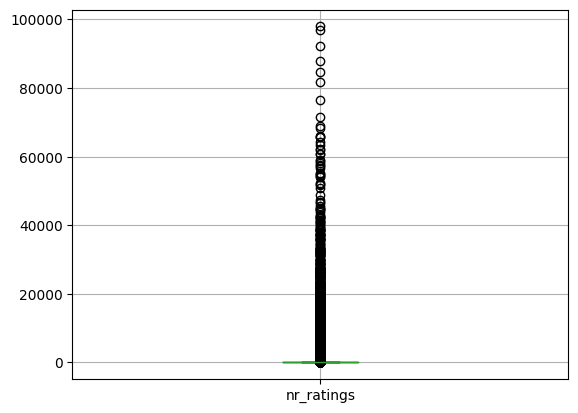

In [22]:
ratings_df_agg.boxplot(column=['nr_ratings'])

In [23]:
len(ratings_df_agg.loc[ratings_df_agg['nr_ratings'] < 10])

29541

In [24]:
# It seems that almost 30k movies have less than 10 ratings
# Let's assume that less than 10 ratings is not statiscally
# significant and those movies will be excluded

ratings_df_agg = ratings_df_agg.loc[ratings_df_agg['nr_ratings'] > 10]

# Benefits
# 1. Isolate the more statistically signifcant subset of our observations
# 2. We can argue that if movies have less than 10 reviews the public might not want to watch it

# Drawbacks
# 1. We might miss certain very niche movies, that could potentially be promoted on the platform
# 2. Correlation between number of reviews and average reviews gets stronger - might paint the wrong picture

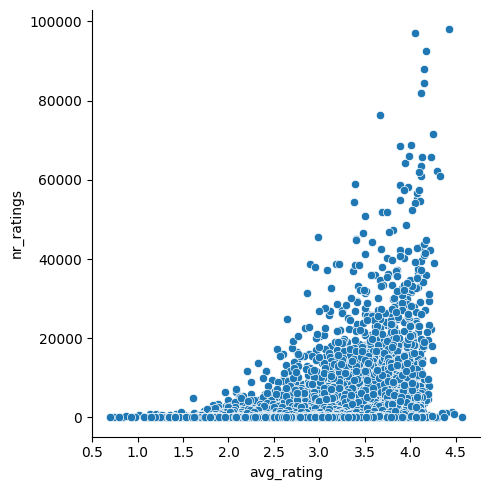

In [25]:
sns.relplot(data=ratings_df_agg, x='avg_rating', y='nr_ratings', kind='scatter')

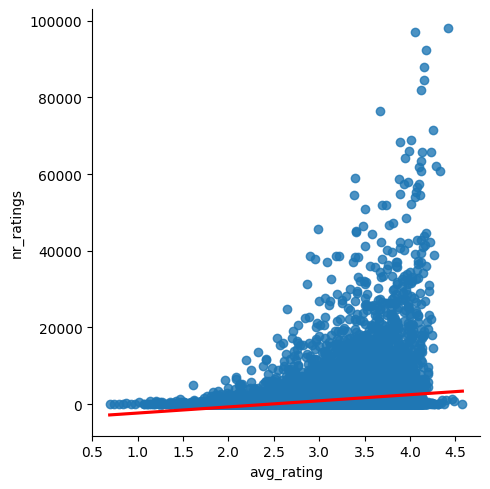

In [26]:
sns.lmplot(data=ratings_df_agg, x='avg_rating', y='nr_ratings', line_kws={'color': 'red'})

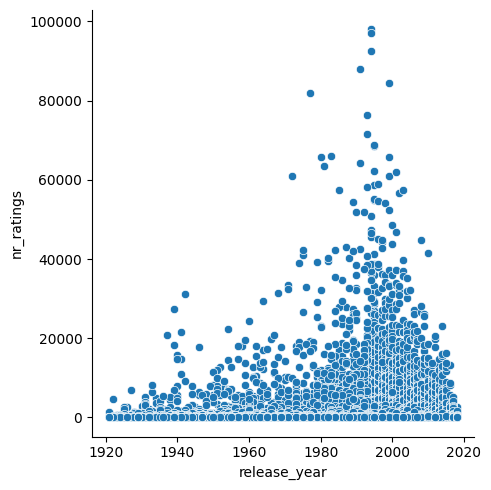

In [27]:
sns.relplot(data=ratings_df_agg, x='release_year', y='nr_ratings', kind='scatter')

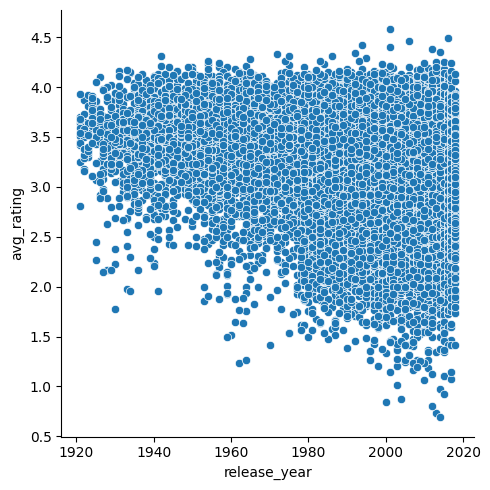

In [28]:
sns.relplot(data=ratings_df_agg, x='release_year', y='avg_rating', kind='scatter')

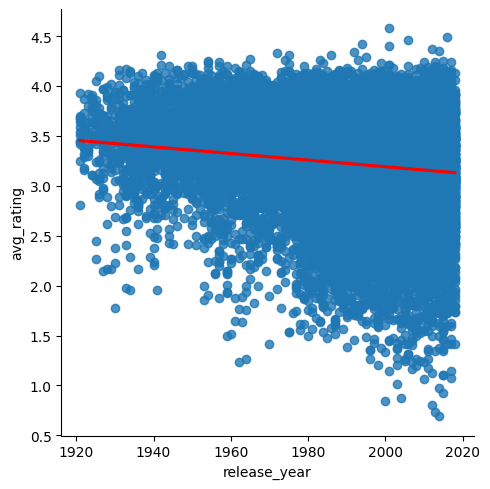

In [29]:
sns.lmplot(data=ratings_df_agg, x='release_year', y='avg_rating', line_kws={'color': 'red'})

## Top 10 movies
- number of ratings
- average rating

In [30]:
ratings_df_agg[['movieId', 'avg_rating', 'nr_ratings', 'title_new', 'release_year']].sort_values('nr_ratings', ascending = False).head(10)

,movieId,avg_rating,nr_ratings,title_new,release_year
315,318,4.424188,97999,"Shawshank Redemption, The",1994
352,356,4.056585,97040,Forrest Gump,1994
293,296,4.173971,92406,Pulp Fiction,1994
587,593,4.151412,87899,"Silence of the Lambs, The",1991
2486,2571,4.149695,84545,"Matrix, The",1999
257,260,4.120455,81815,Star Wars: Episode IV - A New Hope,1977
476,480,3.665034,76451,Jurassic Park,1993
523,527,4.257502,71516,Schindler's List,1993
108,110,4.008481,68803,Braveheart,1995
0,1,3.886649,68469,Toy Story,1995


In [31]:
ratings_df_agg[['movieId', 'avg_rating', 'nr_ratings', 'title_new', 'release_year']].sort_values('avg_rating', ascending = False).head(10)

,movieId,avg_rating,nr_ratings,title_new,release_year
44342,171705,4.576923,13,Den radio,2001
44038,171011,4.486518,853,Planet Earth II,2016
39719,159817,4.458092,1384,Planet Earth,2006
315,318,4.424188,97999,"Shawshank Redemption, The",1994
43907,170705,4.399898,984,Band of Brothers,2001
52416,191999,4.375000,48,The Reichenbach Fall,2012
45436,174053,4.350559,1074,Black Mirror: White Christmas,2014
44765,172591,4.339667,421,The Godfather Trilogy: 1972-1990,1992
843,858,4.332893,60904,"Godfather, The",1972
42915,168282,4.307692,13,George Carlin: Playin' with Your Head,1986


## All ratings, 3 categories

In [33]:
# A lot of high ratings
(ratings_df_agg
 .loc[ratings_df_agg['nr_ratings'] >= 10000]
  [['title_new', 'release_year', 'avg_rating', 'nr_ratings']]
 .sort_values('avg_rating', ascending = False)
 ).head(10)

,title_new,release_year,avg_rating,nr_ratings
315,"Shawshank Redemption, The",1994,4.424188,97999
843,"Godfather, The",1972,4.332893,60904
49,"Usual Suspects, The",1995,4.291959,62180
1195,"Godfather: Part II, The",1974,4.263035,38875
523,Schindler's List,1993,4.257502,71516
1936,Seven Samurai (Shichinin no samurai),1954,4.254116,14578
1178,12 Angry Men,1957,4.237075,17931
887,Rear Window,1954,4.230799,22264
2871,Fight Club,1999,4.230663,65678
1169,One Flew Over the Cuckoo's Nest,1975,4.222920,42181


In [34]:
# A substantial amount of high ratings
(ratings_df_agg .
 loc[(ratings_df_agg['nr_ratings'] < 10000)
 &(ratings_df_agg['nr_ratings'] >= 100)]
  [['title_new', 'release_year', 'avg_rating', 'nr_ratings']]
 .sort_values('avg_rating', ascending = False)
 ).head(10)

,title_new,release_year,avg_rating,nr_ratings
44038,Planet Earth II,2016,4.486518,853
39719,Planet Earth,2006,4.458092,1384
43907,Band of Brothers,2001,4.399898,984
45436,Black Mirror: White Christmas,2014,4.350559,1074
44765,The Godfather Trilogy: 1972-1990,1992,4.339667,421
44758,Last Year's Snow Was Falling,1983,4.261905,126
41155,Over the Garden Wall,2013,4.244032,377
49783,Sherlock - A Study in Pink,2010,4.239437,213
47385,Blue Planet II,2017,4.236390,349
33410,The Blue Planet,2001,4.213777,421


In [35]:
# A small amount of high ratings
(ratings_df_agg .
 loc[ratings_df_agg['nr_ratings'] < 100]
  [['title_new', 'release_year', 'avg_rating', 'nr_ratings']]
 .sort_values('avg_rating', ascending = False)
 ).head(10)

,title_new,release_year,avg_rating,nr_ratings
44342,Den radio,2001,4.576923,13
52416,The Reichenbach Fall,2012,4.375000,48
17611,Welfare,1975,4.307692,13
33702,O Pátio das Cantigas,1942,4.307692,13
42915,George Carlin: Playin' with Your Head,1986,4.307692,13
45547,Obsession,1965,4.275000,20
36439,Tomorrow,2015,4.250000,14
23154,Repentance (Monanieba),1984,4.227273,11
29586,"Guten Tag, Ramón",2013,4.192308,13
35542,Premam,2015,4.181818,22


## Recent ratings, 3 categories

In [36]:
# Average rating per movie
ratings_df_agg_recent = ratings_df.loc[ratings_df['rating_date']>'2015-01-01'].groupby('movieId').agg(
    avg_rating=('rating', 'mean'),
    nr_ratings=('dummy_rating_id', 'count')
)

ratings_df_agg_recent = ratings_df_agg_recent.merge(movies_df, on='movieId', how='inner')
ratings_df_agg_recent = ratings_df_agg_recent.loc[ratings_df_agg_recent['nr_ratings'] > 10]


# A lot of high ratings
(ratings_df_agg_recent
 .loc[ratings_df_agg_recent['nr_ratings'] >= 10000]
  [['title_new', 'release_year', 'avg_rating', 'nr_ratings']]
 .sort_values('avg_rating', ascending = False)
 ).head(10)

,title_new,release_year,avg_rating,nr_ratings
303,"Shawshank Redemption, The",1994,4.367733,31686
785,"Godfather, The",1972,4.251077,17411
2721,Fight Club,1999,4.241372,25411
282,Pulp Fiction,1994,4.233654,20678
1115,"Godfather: Part II, The",1974,4.229071,10237
5294,Spirited Away (Sen to Chihiro no kamikakushi),2001,4.202172,10177
279,Léon: The Professional (a.k.a. The Professiona...,1994,4.180119,10915
14984,Inception,2010,4.160358,28399
1543,Good Will Hunting,1997,4.154274,14283
46,Seven (a.k.a. Se7en),1995,4.145326,11746


In [37]:
# A substantial amount of high ratings
(ratings_df_agg_recent .
 loc[(ratings_df_agg_recent['nr_ratings'] < 10000)
 &(ratings_df_agg_recent['nr_ratings'] >= 100)]
  [['title_new', 'release_year', 'avg_rating', 'nr_ratings']]
 .sort_values('avg_rating', ascending = False)
 ).head(10)

,title_new,release_year,avg_rating,nr_ratings
42451,Planet Earth II,2016,4.486518,853
38132,Planet Earth,2006,4.458092,1384
42320,Band of Brothers,2001,4.399898,984
43849,Black Mirror: White Christmas,2014,4.350559,1074
43178,The Godfather Trilogy: 1972-1990,1992,4.339667,421
1098,12 Angry Men,1957,4.266277,5053
43171,Last Year's Snow Was Falling,1983,4.261905,126
39568,Over the Garden Wall,2013,4.244032,377
48196,Sherlock - A Study in Pink,2010,4.239437,213
45798,Blue Planet II,2017,4.236390,349


In [38]:
# A small amount of high ratings
(ratings_df_agg_recent .
 loc[ratings_df_agg_recent['nr_ratings'] < 100]
  [['title_new', 'release_year', 'avg_rating', 'nr_ratings']]
 .sort_values('avg_rating', ascending = False)
 ).head(10)

,title_new,release_year,avg_rating,nr_ratings
42755,Den radio,2001,4.576923,13
50829,The Reichenbach Fall,2012,4.375000,48
10303,Mother India,1957,4.318182,11
32115,O Pátio das Cantigas,1942,4.307692,13
41328,George Carlin: Playin' with Your Head,1986,4.307692,13
43960,Obsession,1965,4.275000,20
9452,Travellers and Magicians,2003,4.272727,11
8486,Harlan County U.S.A.,1976,4.271186,59
34852,Tomorrow,2015,4.250000,14
8275,"Human Condition III, The (Ningen no joken III)",1961,4.232558,43


## Combined genres

In [40]:
# Find combined genres with highest average rating
(ratings_df_agg.groupby(['genres']).agg(
    avg_rating=('avg_rating', 'mean'),
    nr_ratings=('nr_ratings', 'sum')
)).sort_values('avg_rating', ascending=False).head(20)

,avg_rating,nr_ratings
genres,,
Action|Adventure|Mystery|Romance|Thriller,4.201091,19613
Film-Noir|Romance|Thriller,4.163581,5618
Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,4.162990,41475
Animation|Drama|Fantasy|Romance,4.124481,1205
Sci-Fi|IMAX,4.092869,23081
Crime|Thriller|War,4.087915,10294
Comedy|Musical|War,4.083333,6312
Action|Animation|Crime|Sci-Fi,4.067358,193
Action|Fantasy|Mystery,4.055357,280


## Isolated genres - all ratings

In [42]:
columns = ratings_df_agg.columns[7:27]

In [43]:
avg_rating_per_genre = pd.DataFrame(columns = ['genre', 'avg_rating', 'nr_ratings'])

In [44]:
for column in columns:
   tmp = (ratings_df_agg.groupby([column]).agg(
      avg_rating=('avg_rating', 'mean'),
      nr_ratings=('nr_ratings', 'sum')
    ).reset_index())
   avg_rating_per_genre.loc[column,:] = [tmp.iloc[0,0], tmp.iloc[0,1], tmp.iloc[0,2]]

avg_rating_per_genre = avg_rating_per_genre.sort_values('avg_rating', ascending = False)

In [45]:
avg_rating_per_genre

,genre,avg_rating,nr_ratings
film_noir,Film-Noir,3.518377,272132
documentary,Documentary,3.511232,334158
war,War,3.408685,1422774
drama,Drama,3.339836,12145208
romance,Romance,3.285715,5065755
imax,IMAX,3.271874,1102134
animation,Animation,3.271409,1798293
crime,Crime,3.268019,4622085
musical,Musical,3.26632,1108110
western,Western,3.255632,540305


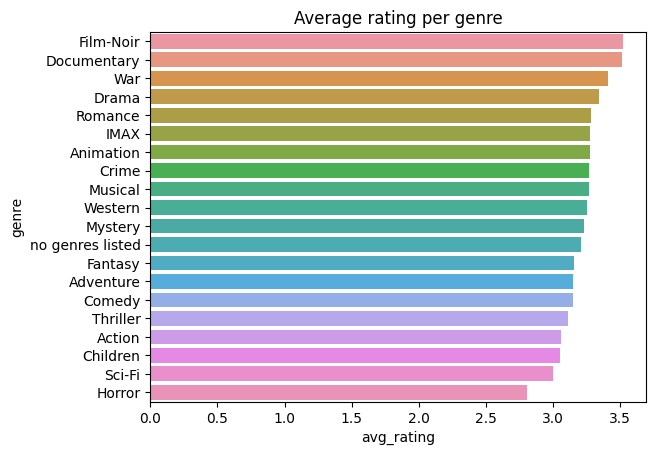

In [46]:
chart5_rating_genre = plt.figure()
bp = sns.barplot(data=avg_rating_per_genre, x="avg_rating", y="genre")
plt.title('Average rating per genre')
chart5_rating_genre.savefig('chart5_rating_genre.png')

# Recommendation #4
# It seems that Film-Noir, Documentary, War, Drama and Romance are within top 5 best rated movie genres

## Isolated genres - recent

In [47]:
# Average rating per movie
ratings_df_agg_recent = ratings_df.loc[ratings_df['rating_date']>'2015-01-01'].groupby('movieId').agg(
    avg_rating=('rating', 'mean'),
    nr_ratings=('dummy_rating_id', 'count')
)

ratings_df_agg_recent = ratings_df_agg_recent.merge(movies_df, on='movieId', how='inner')

ratings_df_agg_recent = ratings_df_agg_recent.loc[ratings_df_agg_recent['nr_ratings'] > 10]

In [48]:
# A lot of high ratings
(ratings_df_agg_recent.loc[ratings_df_agg_recent['nr_ratings'] >= 10000]
  [['movieId', 'avg_rating', 'nr_ratings', 'title_new', 'release_year']]
 .sort_values('avg_rating', ascending = False)
 ).head(10)

,movieId,avg_rating,nr_ratings,title_new,release_year
303,318,4.367733,31686,"Shawshank Redemption, The",1994
785,858,4.251077,17411,"Godfather, The",1972
2721,2959,4.241372,25411,Fight Club,1999
282,296,4.233654,20678,Pulp Fiction,1994
1115,1221,4.229071,10237,"Godfather: Part II, The",1974
5294,5618,4.202172,10177,Spirited Away (Sen to Chihiro no kamikakushi),2001
279,293,4.180119,10915,Léon: The Professional (a.k.a. The Professiona...,1994
14984,79132,4.160358,28399,Inception,2010
1543,1704,4.154274,14283,Good Will Hunting,1997
46,47,4.145326,11746,Seven (a.k.a. Se7en),1995


In [49]:
# A substantial amount of high ratings
(ratings_df_agg_recent .
 loc[(ratings_df_agg_recent['nr_ratings'] < 10000)
 &(ratings_df_agg_recent['nr_ratings'] >= 100)]
  [['movieId', 'avg_rating', 'nr_ratings', 'title_new', 'release_year']]
 .sort_values('avg_rating', ascending = False)
 ).head(10)

,movieId,avg_rating,nr_ratings,title_new,release_year
42451,171011,4.486518,853,Planet Earth II,2016
38132,159817,4.458092,1384,Planet Earth,2006
42320,170705,4.399898,984,Band of Brothers,2001
43849,174053,4.350559,1074,Black Mirror: White Christmas,2014
43178,172591,4.339667,421,The Godfather Trilogy: 1972-1990,1992
1098,1203,4.266277,5053,12 Angry Men,1957
43171,172577,4.261905,126,Last Year's Snow Was Falling,1983
39568,163809,4.244032,377,Over the Garden Wall,2013
48196,185135,4.239437,213,Sherlock - A Study in Pink,2010
45798,179135,4.236390,349,Blue Planet II,2017


In [50]:
# A small amount of high ratings
(ratings_df_agg_recent .
 loc[ratings_df_agg_recent['nr_ratings'] < 100]
  [['movieId', 'avg_rating', 'nr_ratings', 'title_new', 'release_year']]
 .sort_values('avg_rating', ascending = False)
 ).head(10)

,movieId,avg_rating,nr_ratings,title_new,release_year
42755,171705,4.576923,13,Den radio,2001
50829,191999,4.375000,48,The Reichenbach Fall,2012
10303,41650,4.318182,11,Mother India,1957
32115,142871,4.307692,13,O Pátio das Cantigas,1942
41328,168282,4.307692,13,George Carlin: Playin' with Your Head,1986
43960,174551,4.275000,20,Obsession,1965
9452,31900,4.272727,11,Travellers and Magicians,2003
8486,26366,4.271186,59,Harlan County U.S.A.,1976
34852,150696,4.250000,14,Tomorrow,2015
8275,26073,4.232558,43,"Human Condition III, The (Ningen no joken III)",1961


In [51]:
avg_rating_per_genre_recent = pd.DataFrame(columns = ['genre', 'avg_rating', 'nr_ratings'])

In [52]:
for column in columns:
   tmp = (ratings_df_agg_recent.groupby([column]).agg(
      avg_rating=('avg_rating', 'mean'),
      nr_ratings=('nr_ratings', 'sum')
    ).reset_index())
   avg_rating_per_genre_recent.loc[column,:] = [tmp.iloc[0,0], tmp.iloc[0,1], tmp.iloc[0,2]]

avg_rating_per_genre_recent = avg_rating_per_genre_recent.sort_values('avg_rating', ascending = False)

Text(0.5, 1.0, 'Average rating per genre - recent ratings')

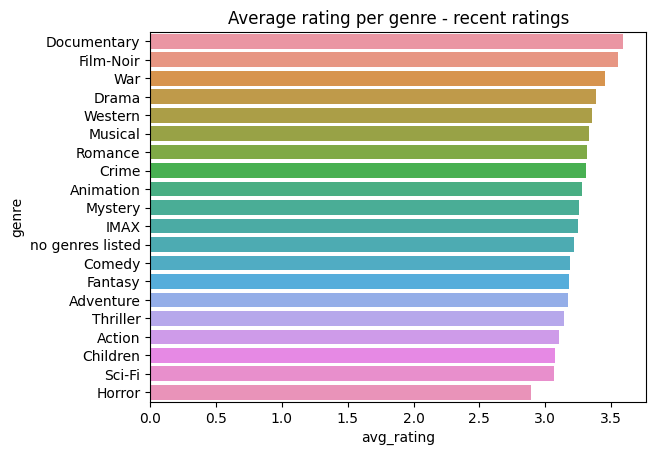

In [53]:
sns.barplot(data=avg_rating_per_genre_recent, x="avg_rating", y="genre")
plt.title('Average rating per genre - recent ratings')

In [54]:
ratings_df_agg['title_characters'] = ratings_df_agg['title'].astype(str).str.len()

# df['a'].astype(str).str.len()

In [55]:
ratings_df_agg.head(5)

,movieId,avg_rating,nr_ratings,title,genres,title_new,release_year,action,adventure,animation,...,imax,musical,mystery,romance,sci_fi,thriller,war,western,no_genre,title_characters
0,1,3.886649,68469,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995,NaN,Adventure,Animation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
1,2,3.246583,27143,Jumanji (1995),Adventure|Children|Fantasy,Jumanji,1995,NaN,Adventure,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
2,3,3.173981,15585,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,1995,NaN,NaN,NaN,...,NaN,NaN,NaN,Romance,NaN,NaN,NaN,NaN,NaN,23
3,4,2.874540,2989,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale,1995,NaN,NaN,NaN,...,NaN,NaN,NaN,Romance,NaN,NaN,NaN,NaN,NaN,24
4,5,3.077291,15474,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34


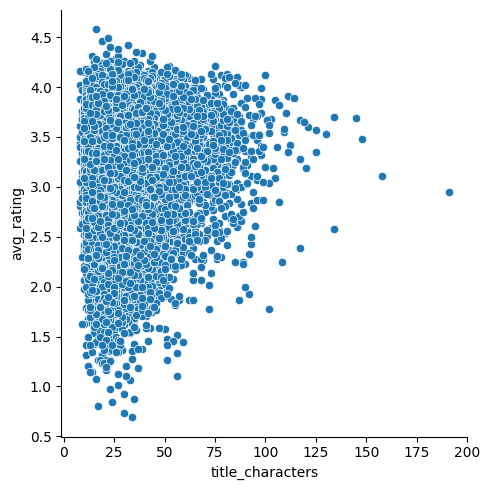

In [56]:
sns.relplot(data=ratings_df_agg, x='title_characters', y='avg_rating', kind='scatter')

## Tags

In [57]:
tags_df.head(5)

,userId,movieId,tag,timestamp,dummy_tag_id,tag_date
0,14,110,epic,1443148538,1,2015-09-25
1,14,110,Medieval,1443148532,2,2015-09-25
2,14,260,sci-fi,1442169410,3,2015-09-13
3,14,260,space action,1442169421,4,2015-09-13
4,14,318,imdb top 250,1442615195,5,2015-09-18


In [58]:
# tags_df.loc[tags_df['movieId'] == 260]

In [59]:
tags_df_joined = tags_df.loc[tags_df['movieId'] != 260].merge(movies_df,on='movieId', how='left')

# ratings_df_agg_overall = ratings_df.groupby('movieId').agg(
#     avg_rating=('rating', 'mean'),
#     nr_ratings=('dummy_rating_id', 'count')
# )

tags_df_joined = tags_df_joined.merge(ratings_df_agg, on='movieId', how='left')
# ratings_df_agg = ratings_df_agg.merge(movies_df, on='movieId', how='inner')

In [ ]:
# tags_df_joined.loc[tags_df_joined['nr_ratings']]

In [61]:
tags_df_joined['tag'].value_counts().head(20)

sci-fi                8350
atmospheric           6392
action                5940
comedy                5910
surreal               5299
based on a book       5294
funny                 4854
twist ending          4844
visually appealing    4333
dystopia              4268
dark comedy           4026
BD-R                  4024
romance               3845
stylized              3782
thought-provoking     3752
psychology            3691
woman director        3669
quirky                3625
fantasy               3613
time travel           3445
Name: tag, dtype: int64

In [60]:
(tags_df_joined.groupby(['movieId', 'tag']).agg(
    nr_tags=('dummy_tag_id','count')
).reset_index()
.sort_values(by=['nr_tags'], ascending = False)
).head(20)

,movieId,tag,nr_tags
7535,296,Quentin Tarantino,320
69046,2571,sci-fi,301
282257,79132,alternate reality,295
78382,2959,twist ending,294
104169,4226,nonlinear,263
282417,79132,thought-provoking,247
7654,296,dark comedy,244
2170,50,twist ending,239
104217,4226,twist ending,238
78333,2959,psychology,235


In [62]:
tags_df_joined['avg_rating'].describe()

count    999465.000000
mean          3.566853
std           0.444393
min           0.736842
25%           3.323817
50%           3.649929
75%           3.881851
max           4.486518
Name: avg_rating, dtype: float64

In [63]:
tags_df_joined['rating_bin'] = np.where(tags_df_joined['avg_rating']<3.25, '1. Below p25',
                        np.where(tags_df_joined['avg_rating']<3.60, '2. Below p50',
                        np.where(tags_df_joined['avg_rating']<3.87, '3. Below p75',
                                '4. Above p75'))
                        )

tags_df_joined_agg = (tags_df_joined.groupby(['rating_bin', 'tag']).agg(
    nr_tags=('dummy_tag_id','count')
).reset_index()
.sort_values(by=['rating_bin', 'nr_tags'], ascending = False)
).groupby('rating_bin').head(20)

In [64]:
tags_df_joined_agg

,rating_bin,tag,nr_tags
100449,4. Above p75,atmospheric,3213
117208,4. Above p75,sci-fi,2997
120918,4. Above p75,twist ending,2845
120165,4. Above p75,thought-provoking,2446
119485,4. Above p75,surreal,2433
...,...,...,...
24314,1. Below p25,predictable,666
18743,1. Below p25,high school,652
17395,1. Below p25,franchise,650
25194,1. Below p25,remake,621


Text(0.5, 1.0, 'Tags used for movies with rating more than 3.87')

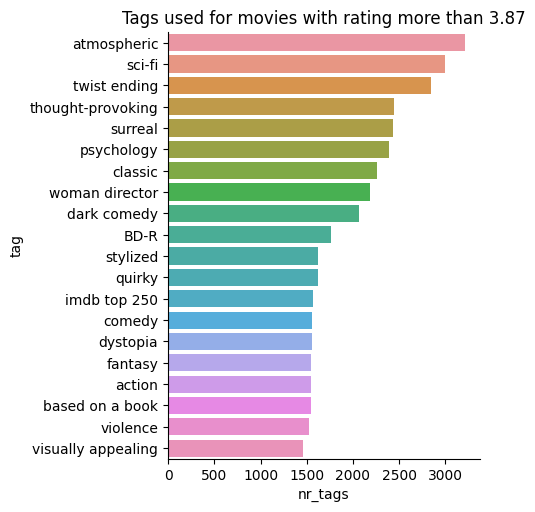

In [65]:
sns.catplot(data=tags_df_joined_agg.loc[tags_df_joined_agg['rating_bin'] == '4. Above p75'], x='nr_tags', y='tag', kind='bar')
plt.title('Tags used for movies with rating more than 3.87')

Text(0.5, 1.0, 'Tags used for movies with rating between 3.60 and 3.86')

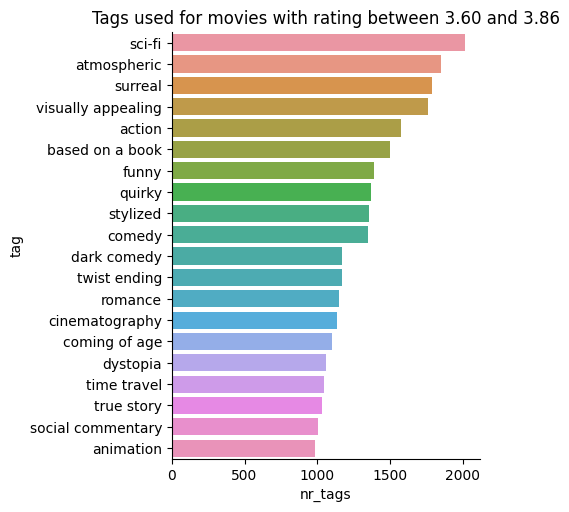

In [66]:
sns.catplot(data=tags_df_joined_agg.loc[tags_df_joined_agg['rating_bin'] == '3. Below p75'], x='nr_tags', y='tag', kind='bar')
plt.title('Tags used for movies with rating between 3.60 and 3.86')

Text(0.5, 1.0, 'Tags used for movies with rating between 3.25 and 3.59')

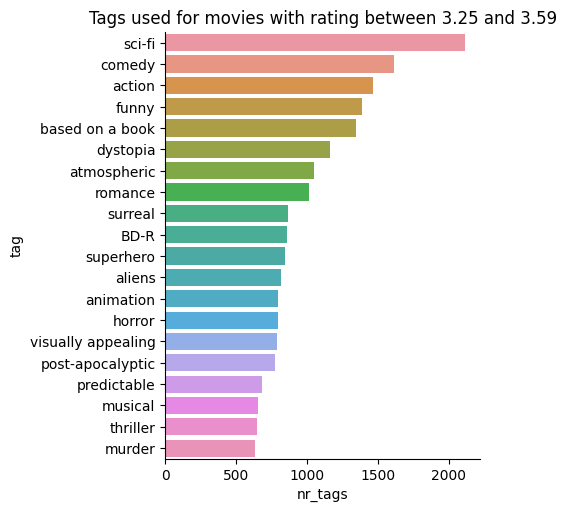

In [67]:
sns.catplot(data=tags_df_joined_agg.loc[tags_df_joined_agg['rating_bin'] == '2. Below p50'], x='nr_tags', y='tag', kind='bar')
plt.title('Tags used for movies with rating between 3.25 and 3.59')

Text(0.5, 1.0, 'Tags used for movies with rating less than 3.25')

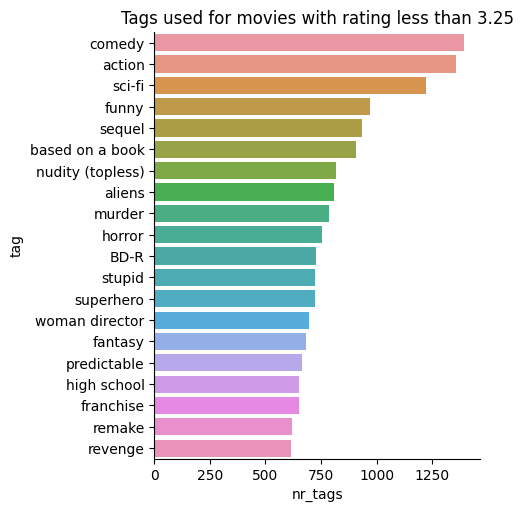

In [68]:
sns.catplot(data=tags_df_joined_agg.loc[tags_df_joined_agg['rating_bin'] == '1. Below p25'], x='nr_tags', y='tag', kind='bar')
plt.title('Tags used for movies with rating less than 3.25')